In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [5]:
class_name = "Occupancy"
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/jupyter_notebooks/data/scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


# Data Partitioning

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

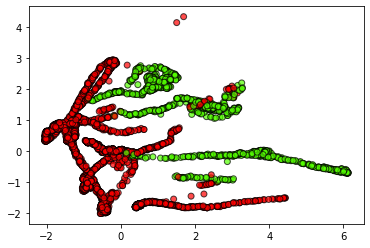

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [9]:
from sklearn.svm import LinearSVC

In [10]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99399007 0.9782814 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99372713 0.97735849]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99399007 0.9782814 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [13]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [14]:
support_vectors_pca = pca.transform(support_vectors)

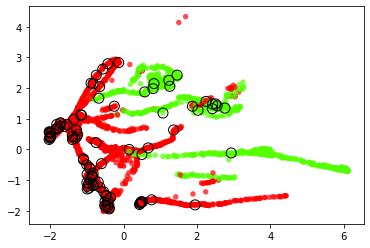

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Effect of C

/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


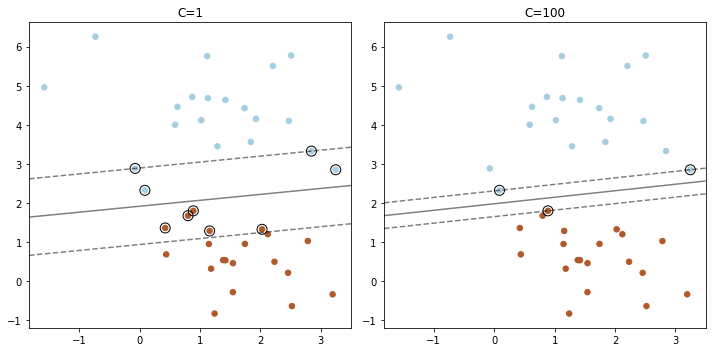

In [16]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [8]:
from sklearn.svm import SVC

In [9]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99398693 0.97832234]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [10]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99398693 0.97832234]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [11]:
clf.support_

array([   9,   76,  109,  128,  149,  222,  223,  254,  273,  283,  284,
        340,  364,  365,  372,  404,  475,  480,  508,  526,  529,  576,
        584,  590,  614,  616,  630,  686,  714,  720,  734,  746,  887,
        890,  904,  910,  916,  933, 1041, 1059, 1148, 1151, 1155, 1166,
       1176, 1187, 1188, 1256, 1262, 1303, 1330, 1381, 1382, 1593, 1604,
       1682, 1756, 1823, 1945, 1969, 1979, 1981, 1986, 2015, 2026, 2038,
       2042, 2054, 2057, 2063, 2065, 2126, 2130, 2264, 2467, 2505, 2510,
       2589, 2590, 2602, 2609, 2640, 2654, 2669, 2689, 2705, 2711, 2796,
       2868, 2911, 2995, 3059, 3104, 3113, 3147, 3157, 3193, 3197, 3244,
       3268, 3276, 3284, 3313, 3320, 3339, 3364, 3396, 3417, 3434, 3496,
       3497, 3533, 3537, 3718, 3728, 3811, 3823, 3879, 3904, 3925, 3928,
       3943, 3947, 3949, 3968, 3984, 4104, 4128, 4140, 4145, 4188, 4193,
       4274, 4280, 4315, 4337, 4358, 4366, 4380, 4418, 4428, 4470, 4497,
       4559, 4580, 4586, 4634, 4641, 4700, 4726, 48

In [12]:
clf.support_vectors_[:10]

array([[ 0.96465802, -1.03627564, -0.26968439,  0.481874  , -0.7952498 ,
         1.        ],
       [ 1.64322151,  0.06662471, -0.19437178,  0.94321435,  0.56358343,
         1.        ],
       [ 1.64322151,  0.06662471,  1.97172149,  0.90980695,  0.56358343,
         1.        ],
       [-0.51048001,  1.35032841, -0.61372607, -0.52671146,  1.13894081,
         1.        ],
       [ 0.0795752 , -0.59918358,  1.57376283, -0.46546456, -0.5675063 ,
         1.        ],
       [ 1.40719942,  2.15399924, -0.61372607,  3.61262508,  2.7322407 ,
         1.        ],
       [ 2.23327672,  0.04854438,  2.28238599,  1.24467641,  0.733624  ,
         1.        ],
       [ 0.0795752 ,  0.42823139,  0.68028145, -0.56489135,  0.4442786 ,
         0.        ],
       [ 1.84974083, -1.45212332,  1.22201872, -0.4789866 , -1.03958764,
         0.        ],
       [-0.71699934, -1.26318383, -0.61372607, -0.53625644, -1.38234395,
         1.        ]])

In [13]:
clf.n_support_, len(X_train)

(array([174, 175], dtype=int32), 5700)

## Effect of Different Kernels

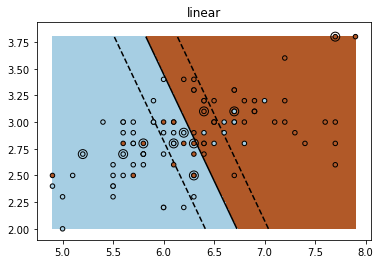

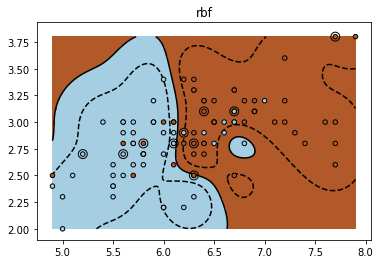

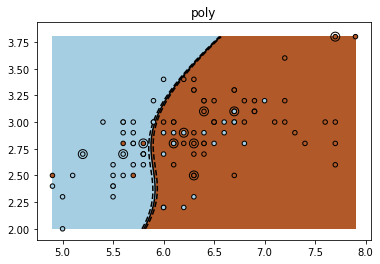

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [14]:
class_name = "Occupancy"
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/jupyter_notebooks/data/scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


In [20]:
attributes = ['Temperature','Humidity'] #[col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]

# n_sample = len(X)

# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

# X_train = X[:int(.9 * n_sample)]
# y_train = y[:int(.9 * n_sample)]
# X_test = X[int(.9 * n_sample):]
# y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()